<a href="https://colab.research.google.com/github/Dzy00/CHL5230-Datathon-5/blob/main/CHL5230_datathon5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHL5230 Datathon 5


---
### Exploratory Data Analysis


(999999, 14)
Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')
alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64


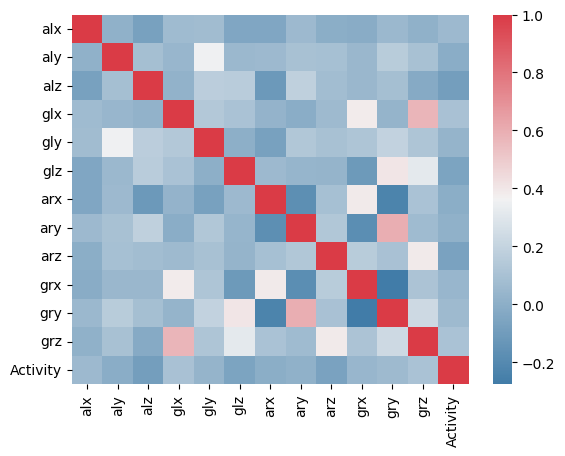

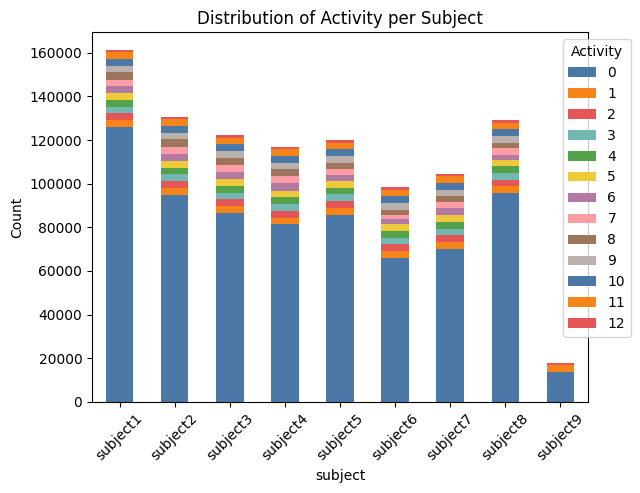

In [ ]:
# CHL5230 datathon 5 explore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


# read dataset
# Load the CSV file into a DataFrame
file_path = 'mhealth.csv'
data = pd.read_csv(file_path)

data.head()

# check dimension of the dataset
print(data.shape)

# list the columns of the dataframe
print(data.columns)

# check missing value
print(data.isnull().sum()) # 0 NA

# understand data
data['subject'].unique()
data['Activity'].unique()

# Group the dataset by the 'subject' column and check number of records each subject has
data.groupby('subject').apply(len)

# randomly sample 20000 rows because the dataset is too large and we are using computationally intensive methods
# data = data.sample(n=20000)

########################################## plots
# correlation matrix between variables
Mcorr = data.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(Mcorr, annot=False, cmap=cmap)
plt.show()

# distributin of activities
counts = data['Activity'].value_counts()
# Define color sequence
colors = px.colors.qualitative.T10 #Set3
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Activity',
    color_discrete_sequence=colors  # apply colors
)
fig.show()

# plot activity per subject
# pivot table
pivot = pd.pivot_table(data[['subject','Activity']], index='subject', columns='Activity', aggfunc=len)
# plot stacked bar
ax = pivot.plot.bar(stacked=True, color = colors)
ax.set_title('Distribution of Activity per Subject')
ax.set_ylabel('Count')
subjects = data['subject'].unique()
ax.set_xticklabels(subjects, rotation=45)
ax.legend(title='Activity', bbox_to_anchor=(1.1, 1.0))
plt.show()







---


### Recurrent Neural Network

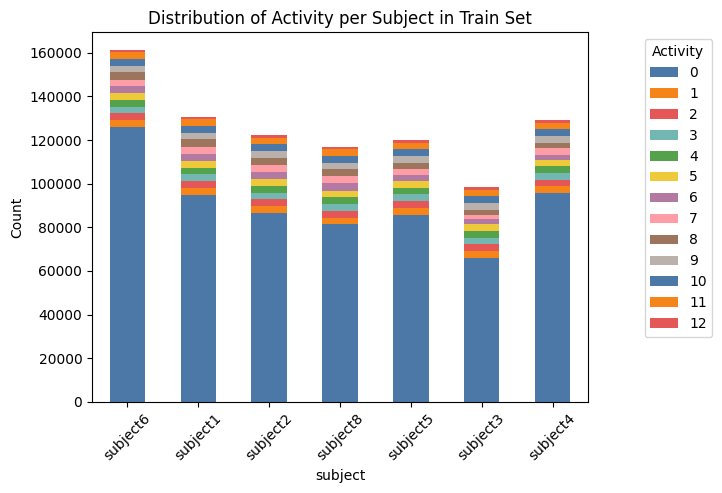

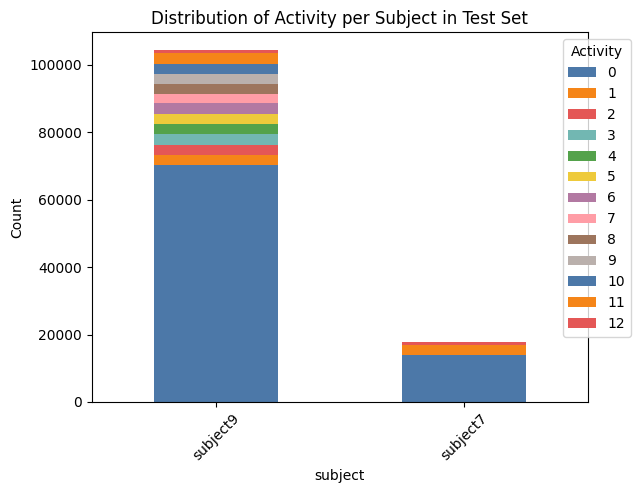

Epoch 0/30 ---> Train Accuracy: 72.16905901116428%, Validation Accuracy: 68.22276822276822%
Epoch 1/30 ---> Train Accuracy: 72.41968557758031%, Validation Accuracy: 68.63226863226863%
Epoch 2/30 ---> Train Accuracy: 72.41968557758031%, Validation Accuracy: 68.55036855036855%
Epoch 3/30 ---> Train Accuracy: 71.42857142857143%, Validation Accuracy: 68.38656838656838%
Epoch 4/30 ---> Train Accuracy: 72.86397812713602%, Validation Accuracy: 68.63226863226863%
Epoch 5/30 ---> Train Accuracy: 73.1032125768968%, Validation Accuracy: 70.10647010647011%
Epoch 6/30 ---> Train Accuracy: 73.49054454317613%, Validation Accuracy: 68.55036855036855%
Epoch 7/30 ---> Train Accuracy: 73.46776030986557%, Validation Accuracy: 68.55036855036855%
Epoch 8/30 ---> Train Accuracy: 73.57028935976304%, Validation Accuracy: 68.55036855036855%
Epoch 9/30 ---> Train Accuracy: 73.74117110959216%, Validation Accuracy: 68.55036855036855%
Epoch 10/30 ---> Train Accuracy: 73.70699475962634%, Validation Accuracy: 68.5503

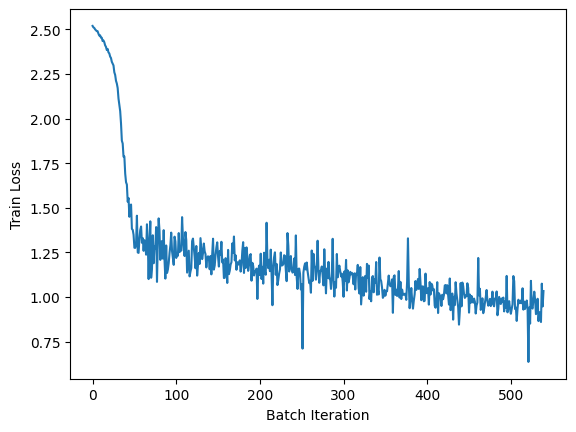

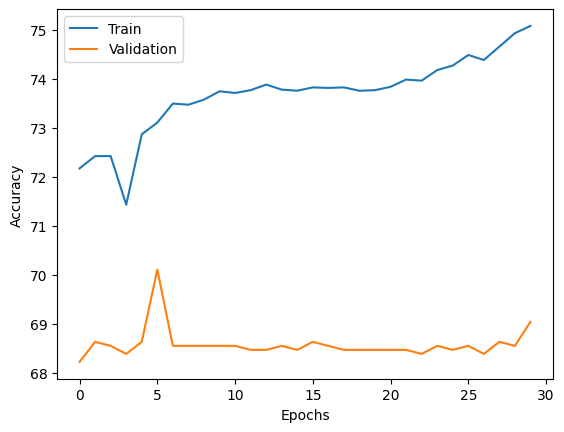

In [1]:
# CHL5230 datathon 5 RNN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')


# read dataset
# Load the CSV file into a DataFrame
file_path = 'mhealth.csv'
data = pd.read_csv(file_path)

# randomly sample 20000 rows because the dataset is too large and we are using computationally intensive methods
# data = data.sample(n=20000)

########################################## data preparation
##### split to train & test
# Grouping by subject and creating a list of dataframes, one per group (a subject)
grouped = data.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
# so 80% of subjects are in train set, 20% of the subjects are in test set
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=20)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

##### normalization
# Identifying numerical columns (excluding 'subject' and 'Activity')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()
train_df.shape
# subject 7, 9 are in test set, other subjects are in train set


##### generate sequence for each subject, sequence contain time ordered sensor signals
##### create sequence
def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']
X_train, y_train = create_sequences(train_df, sequence_length=100)
X_test, y_test = create_sequences(test_df, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


##### Class imbalance
# Checking the class distribution in the 'Activity' column of the training set
class_distribution = train_df.groupby('subject')['Activity'].value_counts()
# df_groupby = data.groupby(['subject', 'Activity']).size()
train_df[train_df['subject'] == 'subject1']['Activity'].value_counts()

# check class distribution in train and test
# pivot table train
pivot_train = pd.pivot_table(train_df[['subject','Activity']], index='subject', columns='Activity', aggfunc=len)
# plot stacked bar
import plotly.express as px
colors = px.colors.qualitative.T10 #Set3
ax = pivot_train.plot.bar(stacked=True, color = colors)
ax.set_title('Distribution of Activity per Subject in Train Set')
ax.set_ylabel('Count')
subjects_train = train_df['subject'].unique()
ax.set_xticklabels(subjects_train, rotation=45)
ax.legend(title='Activity', bbox_to_anchor=(1.1, 1.0))
plt.show()

# pivot table test
pivot_test = pd.pivot_table(test_df[['subject','Activity']], index='subject', columns='Activity', aggfunc=len)
# plot stacked bar
ax = pivot_test.plot.bar(stacked=True, color = colors)
ax.set_title('Distribution of Activity per Subject in Test Set')
ax.set_ylabel('Count')
subjects_test = test_df['subject'].unique()
ax.set_xticklabels(subjects_test, rotation=45)
ax.legend(title='Activity', bbox_to_anchor=(1.1, 1.0))
plt.show()

'''
# Grouping the original training data by 'subject'
grouped_by_sub = train_df.groupby('subject')

# Creating separate lists for each class NOT WORKING FOR THIS DATASET
groups_class_0 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 0]
groups_class_1 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 1]
groups_class_2 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 2]
groups_class_3 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 3]
groups_class_4 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 4]
groups_class_5 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 5]
groups_class_6 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 6]
groups_class_7 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 7]
groups_class_8 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 8]
groups_class_9 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 9]
groups_class_10 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 10]
groups_class_11 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 11]
groups_class_12 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 12]
'''

'''
# Grouping the original training data by 'subject' and 'Activity'
grouped_by_sub_act = train_df.groupby(['subject', 'Activity'])
'''
# oversample the minority class by replicating i.e. entire sequence of subject 1's activity 12, subject 2's activity 11, etc
# or downsampling: randomly choose some subjects and delete their activity 0
'''
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm

# undersampling the majority groups (class 0)
# Using resample to delete records in groups_class_0 to match the number of records in other classes
oversampled_groups_class_1 = resample(groups_class_1, replace=True, n_samples=len(groups_class_0), random_state=42)
# oversampling records in groups_class_2 to match the number in groups_class_0
oversampled_groups_class_2 = resample(groups_class_2, replace=True, n_samples=len(groups_class_0), random_state=42)

# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
balanced_groups = oversampled_groups_class_1 + oversampled_groups_class_2 + groups_class_0

# Preparing to create a modified copy of the balanced dataset
balanced_groups_copy = []
i = 0
# Looping over each group in the balanced dataset
for i, group in tqdm(enumerate(balanced_groups)):
    # Assigning a new, unique identifier to each record in the group
    group.loc[:,'patient_nbr'] = i
    # Incrementing the identifier for the next group
    i += 1
    # Appending a copy of the modified group to the balanced_groups_copy list
    balanced_groups_copy.append(group.copy())

# Reassembling the balanced training dataset
train_df_balanced = pd.concat(balanced_groups_copy, ignore_index=True)

# Checking the new class distribution in the balanced dataset
print(train_df_balanced.groupby('patient_nbr').apply(lambda x : x.iloc[-1]['readmitted']).value_counts())
'''

######################################## HAVEN'T COMPLETE balancing
######################################## NO NEED FOR PADDING

########################################## Recurrent Neural Network
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2] #12
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 30
learning_rate = 0.0001
batch_size = 512
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


# plot
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()




